In [1]:
import xarray as xr
from hilde.trajectory import reader
from hilde.green_kubo.heat_flux import get_cumulative_kappa, get_heat_flux_aurocorrelation

%matplotlib inline

In [2]:
import seaborn as sns
sns.set_context('paper', font_scale=1.8)

## Create `heat_flux.nc`
Run
```bash
➤ hilde output md CsPbBr_300K.son -hf -d 200
```

In [3]:
# read the heat flux dataset
DS = xr.load_dataset('heat_flux.nc')
DS

<xarray.Dataset>
Dimensions:        (atom: 160, i: 3, time: 571)
Coordinates:
  * time           (time) float64 0.0 25.0 50.0 ... 1.42e+04 1.422e+04 1.425e+04
Dimensions without coordinates: atom, i
Data variables:
    heat_flux      (time, atom, i) float64 -0.0006909 0.000252 ... 5.667e-05
    avg_heat_flux  (time, atom, i) float64 1.241e-05 0.0004071 ... 0.0002368
    positions      (time, atom, i) float64 -0.0967 5.897 0.02605 ... 20.57 12.5
    velocities     (time, atom, i) float64 -0.0001933 -0.003208 ... 0.004441
    forces         (time, atom, i) float64 -0.07848 -0.08067 ... 0.2985 -0.2166
    pressure       (time) float64 0.00353 0.003692 0.00388 ... 0.004159 0.00394
    temperature    (time) float64 323.0 320.1 314.1 312.0 ... 299.9 295.1 302.0
Attributes:
    System Name:                    Br3CsPb
    natoms:                         160
    time unit:                      fs
    timestep:                       25.0
    nsteps:                         570
    volume:       

In [4]:
# Compute heat flux autoccorrelation function
jcorr = get_heat_flux_aurocorrelation(DS)

j = jcorr.sum(axis=(1, 2)).to_series()

[GreenKubo]    Get heat flux autocorrelation from heat flux
[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      309.55  K
[GreenKubo]    -> Prefactor:    1266673.39  W/mK / (eV/AA^/ps)
[GreenKubo]    .. time elapsed: 0.657s


In [5]:
# compute cumulative kappa
kappa = get_cumulative_kappa(DS)

k = kappa.sum(axis=(1, 2)).to_series() / 3

[GreenKubo]    Get heat flux autocorrelation from heat flux
[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      309.55  K
[GreenKubo]    -> Prefactor:    1266673.39  W/mK / (eV/AA^/ps)
[GreenKubo]    .. time elapsed: 0.564s
[GreenKubo]    Integrate heat flux autocorrelation function cumulatively
[GreenKubo]    .. Integrator:   `scipy.integrate.cumtrapz`
[GreenKubo]    .. analytic:      False


In [6]:
k

time
0.0        0.000000
25.0       0.224638
50.0       0.402217
75.0       0.514006
100.0      0.570515
             ...   
14150.0    0.518429
14175.0    0.518483
14200.0    0.518525
14225.0    0.518555
14250.0    0.518572
Name: kappa, Length: 571, dtype: float64

(0, 1000)

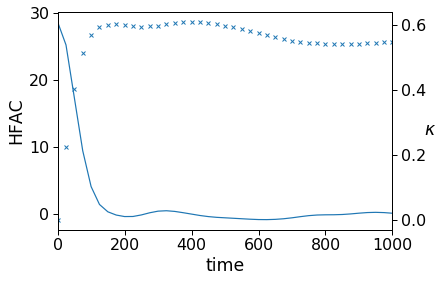

In [7]:
#plot

ax1 = j.plot()
ax1.set_ylabel('HFAC')

ax2 = ax1.twinx()
k.plot(ax=ax2, style='x')
ax2.set_ylabel(r'$\kappa$', rotation=0)


ax1.set_xlim([0, 1000])